In [1]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline
np.random.seed(42)

In [2]:
# only need to run once
pseq.io.download_example_data()

In [3]:
data = pseq.io.load_example()

data_brain = pseq.io.load_example("brain")
data_vnc = pseq.io.load_example("vnc")

data = pseq.concat(data_brain, data_vnc)

data

Nep3  tRNA:Pro-CGG-1-1  CG9570  Or19b  CG15322  Or19a  karr  \
sample cell                                                                
0      0        0                 0       0      0        0      0     0   
       1        0                 0       0      0        0      0     0   
       2        0                 0       0      0        0      0     0   
       3        0                 0       0      0        0      0     0   
       4        0                 0       0      0        0      0     0   
       5        0                 0       0      0        0      0     0   
       6        0                 0       0      0        0      0     0   
       7        0                 0       0      0        0      0     0   
       8        0                 0       0      0        0      0     0   
       9        0                 0       0      0        0      0     0   
       10       1                 0       0      0        0      0     0   
       11       0                 0       0      0        0      0     0   
       12       0                 0       0      0        0      0     0   
       13       0                 0       0      0        0      0     0   
       14       0                 0       0      0        0      0     0   
       15       0                 0       0      0        0      0     0   
       16       0                 0       0      0        0      0     0   
       17       0                 0       0      0        0      0     0   
       18       0                 0       0      0        0      0     0   
       19       0                 0       0      0        0      0     0   
       20       0                 0       0      0        0      0     0   
       21       0                 0       0      0        0      0     0   
       22       0                 0       0      0        0      0     0   
       23       0                 0       0      0        0      0     0   
       24       0                 0       0      0        0      0     0   
       25       0                 0       0      0        0      0     0   
       26       0                 0       0      0        0      0     0   
       27       0                 0       0      0        0      0     0   
       28       0                 0       0      0        0      0     0   
       29       0                 0       0      0        0      0     0   
...           ...               ...     ...    ...      ...    ...   ...   
1      470      0                 0       0      0        0      0     0   
       471      0                 0       0      0        0      0     0   
       472      0                 0       0      0        0      0     0   
       473      0                 0       0      0        0      0     0   
       474      0                 0       0      0        0      0     0   
       475      0                 0       0      0        0      0     0   
       476      0                 0       0      0        0      0     0   
       477      0                 0       0      0        0      0     0   
       478      0                 0       0      0        0      0     0   
       479      0                 0       0      0        0      0     0   
       480      0                 0       0      0        0      0     0   
       481      0                 0       0      0        0      0     0   
       482      0                 0       0      0        0      0     0   
       483      0                 0       0      0        0      0     0   
       484      0                 0       0      0        0      0     0   
       485      0                 0       0      0        0      0     0   
       486      0                 0       0      0        0      0     0   
       487      0                 0       0      0        0      0     0   
       488      0                 0       0      0        0      0     0   
       489      0                 0       0      0        0  

In [4]:
dropped = data.drop_cells(umis=1).drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(1000, 17492)
(1000, 9302)


,min,max,mean,median
umis,0,2439,0,0
umis above 0,1,2439,3,1
umis per cell,1004,28751,2208,1578
genes expressed,331,3384,770,680
umis per gene,1,175549,237,30
cells expressing,0,1000,30,1


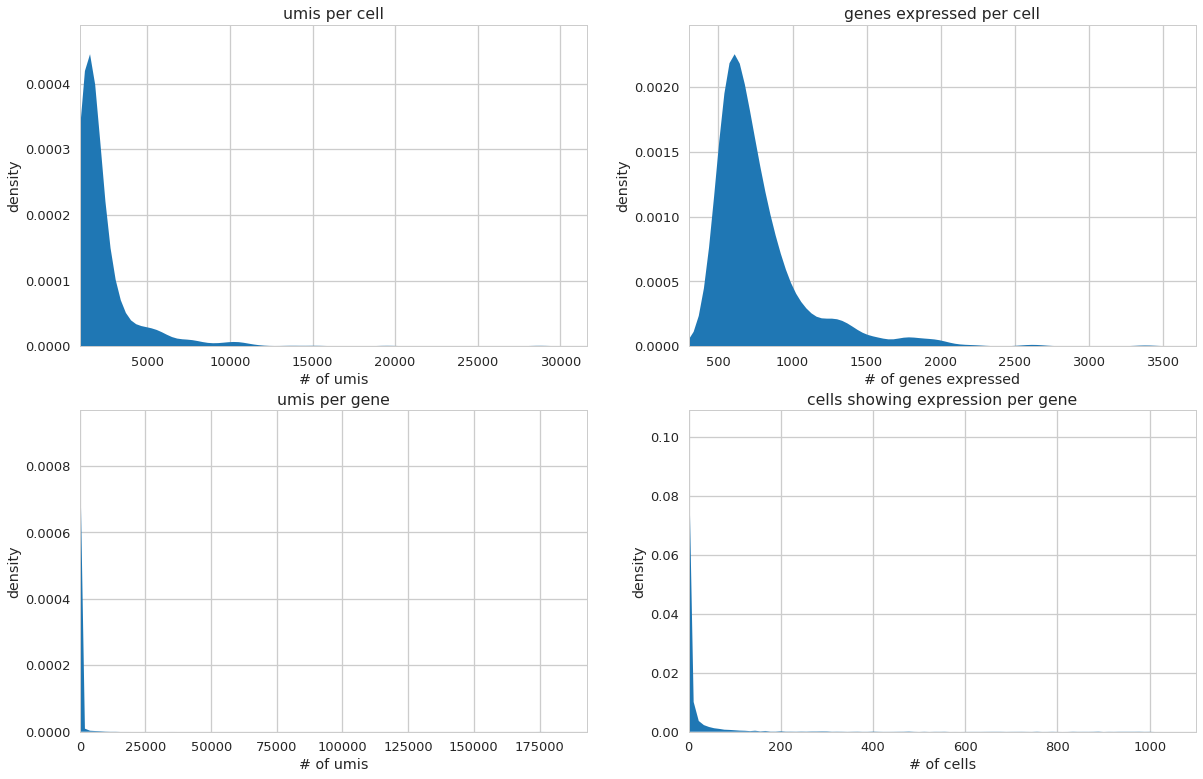

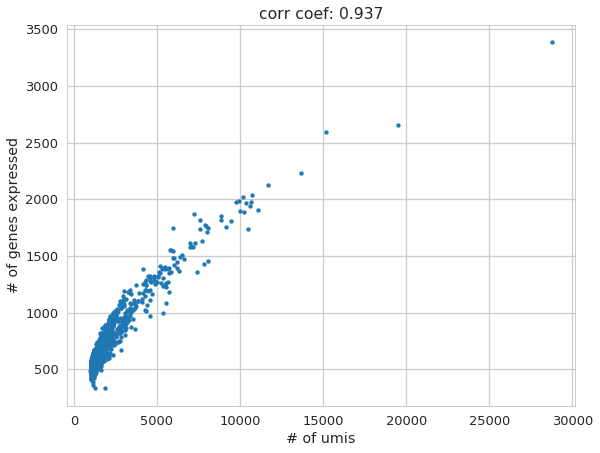

In [5]:
stats = pseq.summary.summarize(dropped)
stats

In [6]:
normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total)
regressed.head()

Nep3   CG33217     Vps11     RpL10       G9a       cin  \
sample cell                                                               
0      0    -0.123260 -0.153940 -0.168442 -1.707557 -0.219111  0.013036   
       1    -0.127422 -0.173681 -0.171653 -1.820915 -0.238166 -0.009997   
       2    -0.118046 -0.129213 -0.164421  0.334000 -0.195244  0.041887   
       3    -0.129290 -0.182542  4.918915  0.725316 -0.246719 -0.020335   
       4    -0.122057 -0.148236 -0.167515 -0.834229 -0.213605  0.019692   

               CG3777   CG12470         y        ac    ...       CG5118  \
sample cell                                            ...                
0      0    -0.043238 -0.035789 -0.120221  0.024651    ...    -0.117142   
       1    -0.041799 -0.035273 -0.125087  0.017672    ...    -0.121646   
       2    -0.045039 -0.036435 -0.114127  0.033393    ...    -0.111501   
       3    -0.041154 -0.035041 -0.127271  0.014539    ...    -0.123668   
       4    -0.043653 -0.035938 -0.118815  0.026668    ...    -0.115841   

                 Plap    CG5080      Tfb4      Pino    CG4629         S  \
sample cell                                                               
0      0    -0.062677 -0.017050 -0.092067 -0.057951 -0.125216 -0.189039   
       1    -0.080807 -0.027728 -0.101770 -0.068087 -0.135005 -0.206194   
       2    -0.039967 -0.003674  6.006128 -0.045254 -0.112955 -0.167552   
       3    -0.088945 -0.032521 -0.106126 -0.072637 -0.139398 -0.213894   
       4    -0.057438 -0.013964 -0.089263 -0.055022 -0.122388 -0.184082   

                 EGFP  tdTomato      GAL4  
sample cell                                
0      0    -0.120408 -0.112374  0.000908  
       1    -0.123635 -0.119123 -0.008014  
       2    -0.116366 -0.103920  0.012083  
       3    -0.125083 -0.122152 -0.012019  
       4    -0.119476 -0.110424  0.003486  

[5 rows x 9302 columns]

pc-0      pc-1      pc-2      pc-3      pc-4      pc-5  \
sample cell                                                                
0      0      5.679647 -3.924781  2.299473 -3.629091 -2.820489  0.759542   
       1      3.119880 -5.317311  3.209461 -6.591615 -2.326396  0.260101   
       2     10.630297 -1.068890 -0.362691  0.474125  0.251997 -0.151881   
       3     15.745825 -1.969756 -2.137468 -1.436331  1.290132  1.516477   
       4     13.308015  1.433281 -1.659412  2.210997  0.172598 -0.786782   

                 pc-6      pc-7      pc-8      pc-9     pc-10     pc-11  \
sample cell                                                               
0      0    -1.667640  0.948439  1.911815  0.248768  0.513315 -1.187482   
       1    -1.088477  2.893768 -0.196630 -1.200293  0.235235 -1.096934   
       2     0.264514 -1.613983  2.537968 -1.097820 -0.964433  0.473021   
       3     1.434186 -1.510975  2.657231  0.056992 -1.072595  0.963077   
       4     0.804742 -1.001211  1.441714 -0.508658 -0.586541  0.320932   

                pc-12     pc-13     pc-14  
sample cell                                
0      0     1.954479 -2.363664 -1.397689  
       1     3.388350 -4.783700 -0.693795  
       2     2.626313 -1.649599  0.341079  
       3     1.686206 -2.842457 -1.438727  
       4     3.270527 -0.944038  1.375612

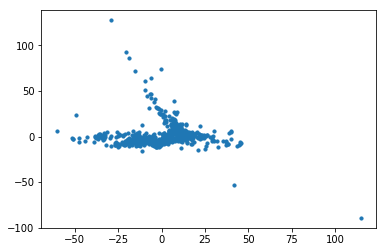

In [7]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [8]:
clusters = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: {}".format(len(np.unique(clusters))))

# go back and attach the results to the data
normed.clusters = clusters
reduced.clusters = clusters
normed.head()

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.13087701797485352 seconds
Jaccard graph constructed in 0.991527795791626 seconds
Wrote graph to binary file in 0.33901119232177734 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.731484
After 2 runs, maximum modularity is Q = 0.733232
Louvain completed 22 runs in 0.5573351383209229 seconds
PhenoGraph complete in 2.036452054977417 seconds
# of clusters: 6


Nep3  CG33217     Vps11     RpL10  G9a  cin  CG3777  \
sample cell cluster                                                        
0      0    1         0.0      0.0  0.000000  0.693147  0.0  0.0     0.0   
       1    1         0.0      0.0  0.000000  0.693147  0.0  0.0     0.0   
       2    0         0.0      0.0  0.000000  1.609438  0.0  0.0     0.0   
       3    0         0.0      0.0  0.693147  1.945910  0.0  0.0     0.0   
       4    0         0.0      0.0  0.000000  1.098612  0.0  0.0     0.0   

                     CG12470    y   ac  ...   CG5118  Plap  CG5080      Tfb4  \
sample cell cluster                     ...                                    
0      0    1            0.0  0.0  0.0  ...      0.0   0.0     0.0  0.000000   
       1    1            0.0  0.0  0.0  ...      0.0   0.0     0.0  0.000000   
       2    0            0.0  0.0  0.0  ...      0.0   0.0     0.0  0.693147   
       3    0            0.0  0.0  0.0  ...      0.0   0.0     0.0  0.000000   
       4    0            0.0  0.0  0.0  ...      0.0   0.0     0.0  0.000000   

                     Pino  CG4629    S  EGFP  tdTomato  GAL4  
sample cell cluster                                           
0      0    1         0.0     0.0  0.0   0.0       0.0   0.0  
       1    1         0.0     0.0  0.0   0.0       0.0   0.0  
       2    0         0.0     0.0  0.0   0.0       0.0   0.0  
       3    0         0.0     0.0  0.0   0.0       0.0   0.0  
       4    0         0.0     0.0  0.0   0.0       0.0   0.0  

[5 rows x 9302 columns]

In [9]:
#%%timeit -n 1 -r 1
tsne = pseq.dim.tsne(reduced, algo='sklearn', perplexity=15.0, verbose=1)
#tsne = pseq.dim.tsne(reduced, algo='multicore', n_jobs=8, perplexity=30.0, verbose=1)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.025985
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.562439
[t-SNE] KL divergence after 1000 iterations: 0.701531


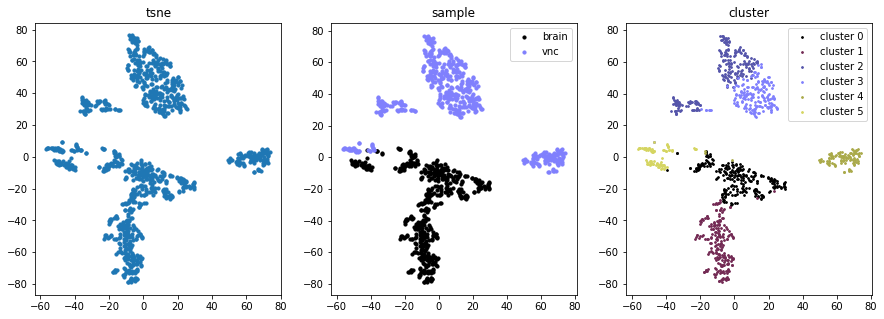

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pseq.viz.scatter(tsne, s=10)
plt.title('tsne')

plt.subplot(1, 3, 2)
pseq.viz.scatter(tsne, color_by="sample", s=10)
plt.title('sample')
plt.legend(["brain", "vnc"], scatterpoints=1)

plt.subplot(1, 3, 3)
pseq.viz.scatter(tsne, color_by="cluster", s=3)
plt.title('cluster')
plt.legend()

plt.show()

In [11]:
top_genes = pseq.upregulated(normed, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]finding genes for cluster 5
[LibLinear]finding genes for cluster 6
[LibLinear]

---

['MRE16', 'CR40469', 'Pen']
['14-3-3zeta', 'Sap47', 'Galphao']
['noe', 'miple1', 'GlyS']
['Hex-A', 'Gapdh2', 'Rdl']
['Antp', 'hdc', 'His4r']
['Obp44a', 'CAH1', 'MFS9']


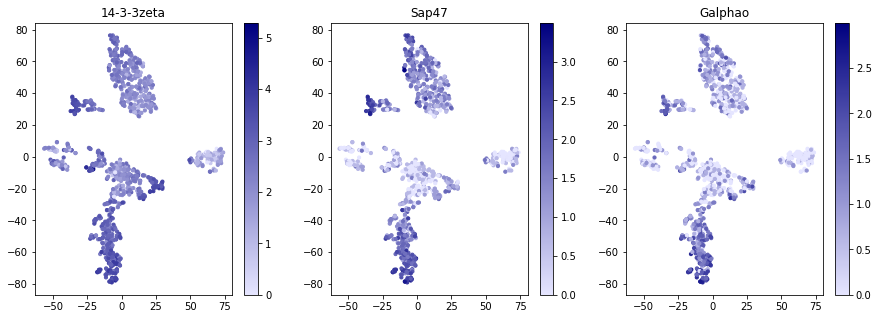

In [12]:
plt.figure(figsize=(15, 5))

import seaborn as sns
cmap = sns.light_palette('navy', as_cmap=True)

# look at expression profile for top genes from cluster 4
genes = top_genes[1]
for i, gene in enumerate(genes):
    plt.subplot(1, len(genes), i+1)
    pseq.viz.scatter(tsne, color_by=normed[gene], cmap=cmap, s=10)
    plt.title(gene)
    plt.colorbar()

plt.show()

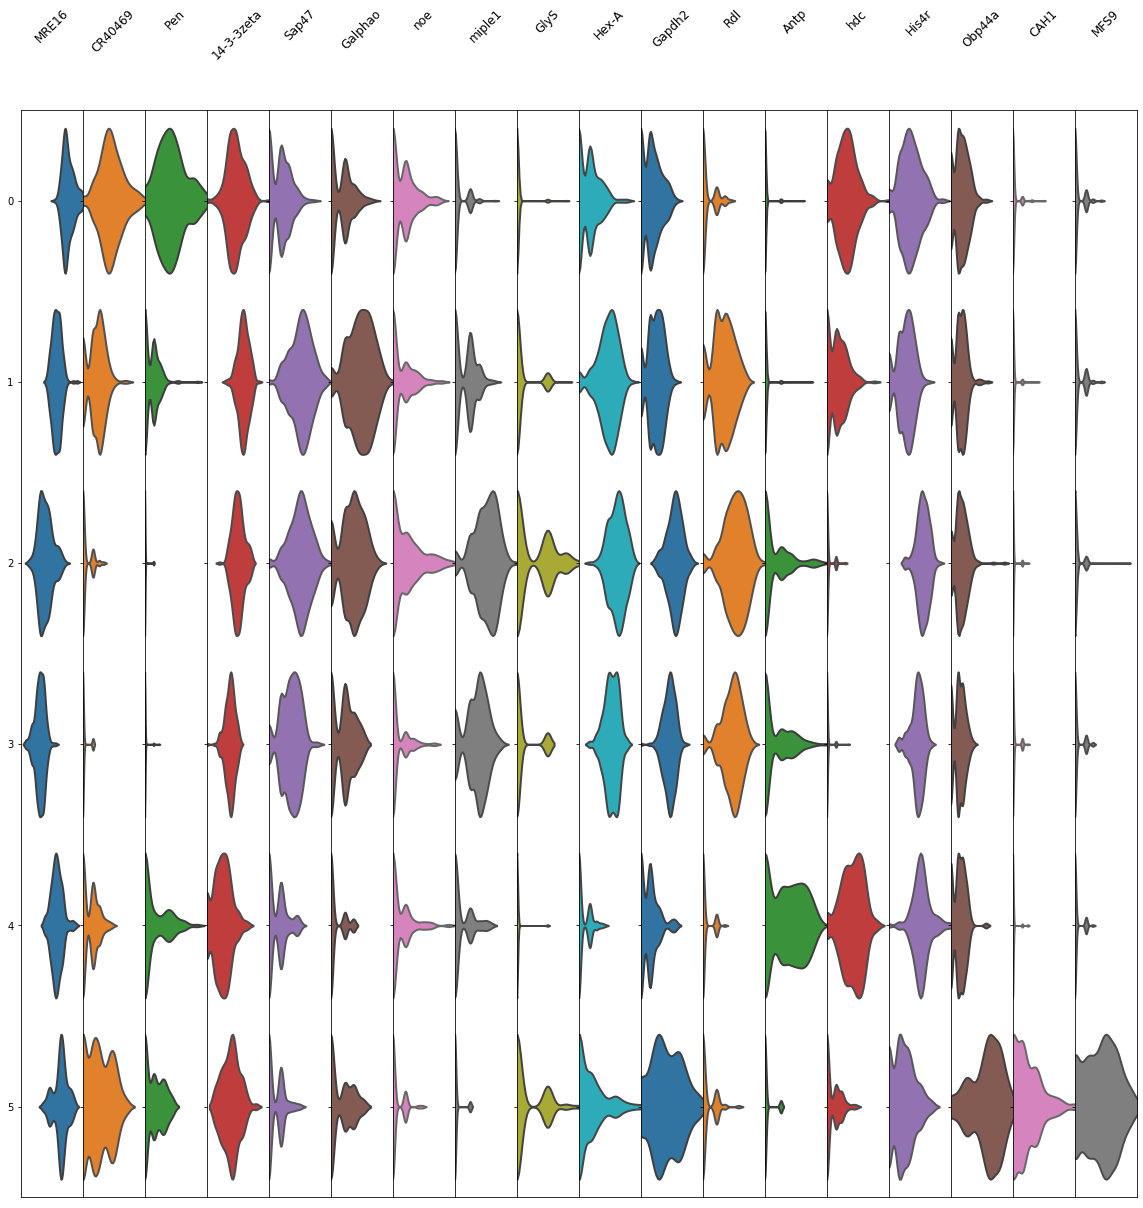

In [13]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, group_by='cluster', cluster_genes=False)